# Asssignment 2

In [42]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data = pd.read_csv('./temperatures.csv')

In [44]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


<AxesSubplot:>

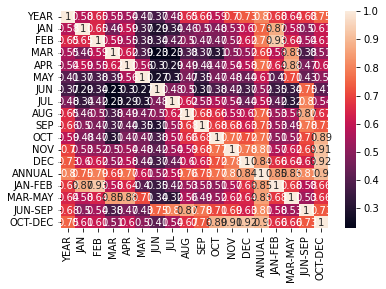

In [69]:

#Finding the correlation between the attributes
#sign of correlation coefficient signifies the positive or negative relationship
#Value of correlation coefficient signifies the strength of their relation
correlations = data.corr()
sns.heatmap(correlations, annot=True)

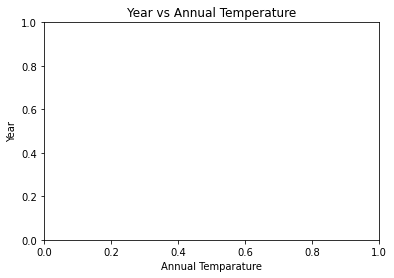

<AxesSubplot:xlabel='ANNUAL', ylabel='YEAR'>

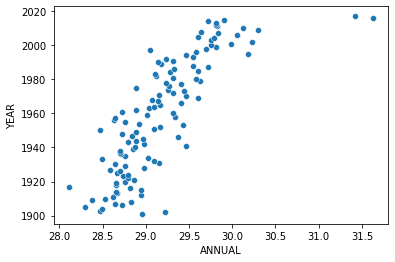

In [56]:
#To find the strongest relationship, we look for the box with the lightest color or the highest value
#From the above we observe that Annual has strongest relationship with Year
#Let's visualize them
plt.title('Year vs Annual Temperature')
plt.xlabel('Annual Temparature')
plt.ylabel('Year')
plt.show()
sns.scatterplot(x='ANNUAL', y='YEAR', data=data)

In [47]:
#This annual temperature seems to be increasing as we go in further in Year

In [48]:
#Building model
#A linear model is the equation of a line that describes the relationship between a predictor(input) variable X (mostly independent variable) and an outcome(output) variable Y.
#For linear model, we will consider the equation as slope-intercept form of line
# To find the bestfit line with minimal residual values is to keep Mean Squared Error
#The Mean Squared Error is a measure of the average of the squares of the residuals.

In [49]:
# Define our predictor and target variables and split data in subsets as Train and Test

X = data[['YEAR']] #independent variable
Y = data['ANNUAL'] #dependent variable

#Creating subsets of data in 70-30%(train:test) split ratio
#passing only those columns which we need in test and train data sets as it will create new dataFrame
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) #random_state=0 indicates seed for randomising the selections of data points constant spliting algorithm on all

In [51]:
from sklearn.linear_model import LinearRegression
# Initialize a linear regression model object
lr = LinearRegression()
# Fit the linear regression model object to our data
lr.fit(x_train.values, y_train.values)

#Therefore the line will be
print('y = ' + str(lr.coef_[0]) + 'x + ' + str(lr.intercept_))

y = 0.011561297825978697x + 6.51906454972902


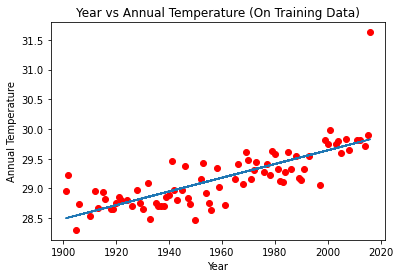

In [65]:
# Show line of best fit
plt.scatter(x_train.values, y_train.values, color='Red')
plt.plot(x_train.values, lr.coef_* x_train.values + lr.intercept_, label='Intercept: 4.7461 \nSlope: 0.01247')
plt.title('Year vs Annual Temperature (On Training Data)')
plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.show()

In [55]:
print("Predicted Annual Temperature in 2025 :", lr.predict([[2025]])[0])

Predicted Annual Temperature in 2022 : 29.93069264733588


In [54]:
# Define a set of predictions for annual temperature based on subset x_test
y_pred = lr.predict(x_test.values)

from sklearn.metrics import mean_squared_error

# We pass the test values and the predicted values
mse = mean_squared_error(y_test, y_pred) #square root of the average of the squared residuals

rmse = np.sqrt(mse) # Let's take the square root
print('Root Mean Squared Error: ' + str(rmse)) #quite small

Root Mean Squared Error: 0.3810049782331301
